# 1.Import các thư viện cần thiết

In [781]:
# %pip install pandas
# %pip install scikit-learn
# %pip install numpy
# %pip install matplotlib
# %pip install joblib           

In [782]:


# Import các thư viện cần thiết

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import joblib


# 2.Import datasheet và tiền xử lý dữ liệu

In [783]:
# Đọc dữ liệu
url = "penguins_size.csv"
data = pd.read_csv(url, delimiter=',')

In [784]:
# Show data
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [785]:
# Xóa các hàng có giá trị thiếu
data.dropna(inplace=True)

# Ánh xạ giá trị của species sang số nguyên
species_map = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
data['species'] = data['species'].map(species_map)

# Chia dữ liệu thành features và label
X = data[['culmen_length_mm', 'culmen_depth_mm']]
y = data['species']

In [786]:
#Data
X

,culmen_length_mm,culmen_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [787]:
#label
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 334, dtype: int64

In [788]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [789]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # type: ignore



# Chọn tính năng
selector = SelectKBest(k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)





c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=2. All the features will be returned.
  warnings.warn(


In [790]:
X_train

array([[-5.96447406e-01, -1.74305279e+00],
       [-1.26580555e+00,  3.27614480e-01],
       [ 1.09554123e+00, -6.31963035e-01],
       [-1.52611149e+00,  1.03467160e+00],
       [-6.70820533e-01,  8.83159357e-01],
       [ 5.43174521e-02,  7.50940811e-02],
       [ 2.04379859e+00, -5.81458955e-01],
       [-2.24581773e-01, -2.04607727e+00],
       [ 1.87645906e+00,  1.84273687e+00],
       [-1.07987273e+00,  1.03467160e+00],
       [-1.26580555e+00,  1.69122463e+00],
       [-1.17283914e+00,  4.79126719e-01],
       [ 6.86489029e-01, -1.08649975e+00],
       [-7.26600378e-01, -7.64181581e-02],
       [-9.12533195e-01,  7.31647117e-01],
       [-5.96447406e-01, -2.78434477e-01],
       [-1.11705929e+00,  7.31647117e-01],
       [ 5.74929339e-01, -8.33979354e-01],
       [-9.44288013e-02, -1.64204463e+00],
       [-9.86906322e-01,  1.43870423e+00],
       [ 6.30709184e-01, -1.59154055e+00],
       [ 1.74630608e+00,  1.38820015e+00],
       [ 8.16642001e-01,  1.76102241e-01],
       [ 1.

In [791]:
y_train

230    2
84     0
303    2
22     0
29     0
      ..
194    1
77     0
112    0
277    2
108    0
Name: species, Length: 267, dtype: int64

In [792]:
X_test

array([[-0.85675335, -0.2279304 ],
       [ 0.51914949, -1.28851607],
       [-0.37332803,  0.98416752],
       [ 1.05835466,  0.07509408],
       [-0.55926084,  0.5296308 ],
       [ 0.14728386, -1.69254871],
       [ 1.2256942 , -1.08649975],
       [ 1.03976138,  0.73164712],
       [ 1.0211681 ,  0.5296308 ],
       [ 1.35584717,  0.93366344],
       [-0.22458177,  0.22660632],
       [-1.76782415,  1.99424911],
       [ 0.74226887, -1.03599567],
       [-1.35877195,  0.68114304],
       [ 0.18447042, -1.38952423],
       [-1.32158539, -0.32893856],
       [-1.47033165,  0.02459   ],
       [ 0.44477637,  0.37811856],
       [-1.37736524,  0.83265528],
       [ 0.29603011, -1.64204463],
       [-0.26176834,  0.58013488],
       [-0.63363397, -0.07641816],
       [ 0.50055621, -0.53095488],
       [ 1.2256942 ,  1.28719199],
       [-0.96831304,  0.32761448],
       [-1.02409288, -0.07641816],
       [ 0.14728386, -1.94506911],
       [ 1.37444045, -0.42994672],
       [ 2.58300376,

In [793]:
y_test

30     0
317    2
79     0
201    1
63     0
      ..
288    2
4      0
83     0
319    2
66     0
Name: species, Length: 67, dtype: int64

# 3.Huấn luyện mô hình dựa trên Preceptron Learning Algorithm

In [794]:

# Tạo mô hình PLA
perceptron = Perceptron(max_iter=500,
    tol=1e-3,
    eta0=0.1)

# Huấn luyện mô hình PLA
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=500)

In [795]:
# Lưu mô hình
joblib.dump(perceptron, 'perceptron.pkl')


['perceptron.pkl']

In [796]:
# Dự đoán trên tập kiểm tra
y_pred_pla = joblib.load('perceptron.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình PLA trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_pla):", y_pred_pla)
print("Độ chính xác:", accuracy_score(y_test, y_pred_pla))



Kết quả dự đoán của mô hình PLA trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
288    2
4      0
83     0
319    2
66     0
Name: species, Length: 67, dtype: int64
Kết quả dự đoán (y_pred_pla): [0 2 0 1 0 2 2 1 1 1 0 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 1 1 2 2 1 0 0 1 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 0 0 1 1 1 2 2 0 0 1 0]
Độ chính xác: 0.9104477611940298


In [797]:
# Đánh giá mô hình PLA
print("PLA Classification Report :")
print(classification_report(y_test, y_pred_pla))

#PLA Classification Report maxiter = 1000 tol 1e-3:
#               precision    recall  f1-score   support

#            0       0.98      1.00      0.99        49
#            1       0.71      0.94      0.81        18
#            2       1.00      0.79      0.89        34

#     accuracy                           0.92       101
#    macro avg       0.90      0.91      0.89       101
# weighted avg       0.94      0.92      0.92       101



PLA Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.71      0.92      0.80        13
           2       0.95      0.78      0.86        23

    accuracy                           0.91        67
   macro avg       0.88      0.90      0.89        67
weighted avg       0.92      0.91      0.91        67



In [798]:
print("Ma trận nhầm lẫn PLA:", confusion_matrix(y_test, y_pred_pla))

Ma trận nhầm lẫn PLA: [[31  0  0]
 [ 0 12  1]
 [ 0  5 18]]


In [799]:
# Chuyển đổi X_test thành DataFrame pandas
X_test_df = pd.DataFrame(X_test, columns=['culmen_length_mm', 'culmen_depth_mm'])

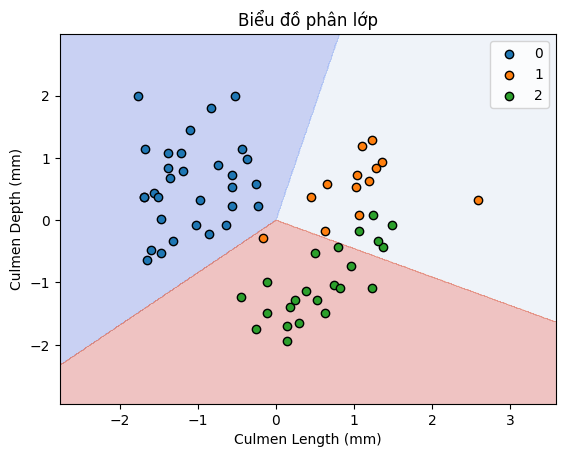

In [800]:
# Vẽ biểu đồ phân lớp
#

# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp')
plt.legend()
plt.show()

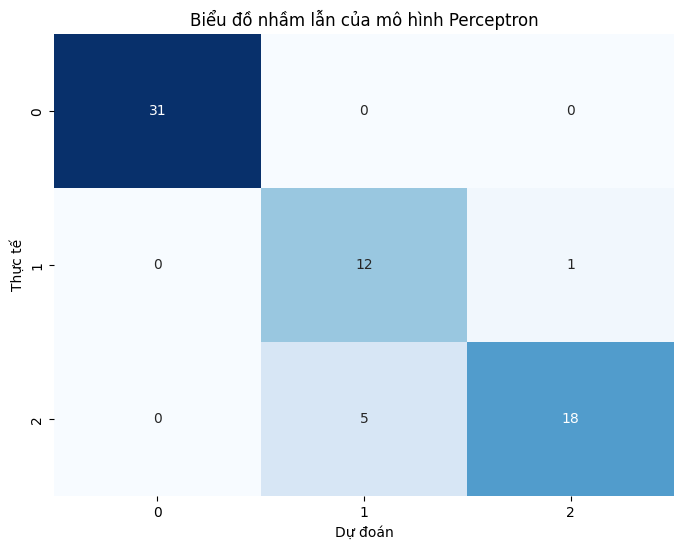

In [801]:

# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred_pla)

# Vẽ biểu đồ nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Biểu đồ nhầm lẫn của mô hình Perceptron')
plt.show()

# 4.Huấn luyện mô hình dựa trên ID3



In [802]:
    
# Tạo mô hình ID3
id3 = DecisionTreeClassifier(
    criterion='entropy',       
    random_state=42)

# Huấn luyện mô hình ID3
id3.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [803]:
# Lưu mô hình
joblib.dump(id3, 'id3.pkl')




['id3.pkl']

In [804]:
# Dự đoán trên tập kiểm tra
y_pred_id3 = joblib.load('id3.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình ID3 trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_id3):", y_pred_id3)
print("Độ chính xác:", accuracy_score(y_test, y_pred_id3))



Kết quả dự đoán của mô hình ID3 trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
288    2
4      0
83     0
319    2
66     0
Name: species, Length: 67, dtype: int64
Kết quả dự đoán (y_pred_id3): [0 2 0 1 0 2 2 1 1 1 1 0 2 0 2 0 0 1 0 2 1 0 2 1 0 0 2 2 1 2 1 2 0 0 1 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 0 0 1 1 2 2 2 0 0 2 0]
Độ chính xác: 0.9552238805970149


In [805]:
# Đánh giá mô hình ID3
print("ID3 Classification Report :")
print(classification_report(y_test, y_pred_id3))
# ID3 Classification Report:
#               precision    recall  f1-score   support

#            0       0.98      0.98      0.98        49
#            1       0.73      0.89      0.80        18
#            2       0.97      0.85      0.91        34

#     accuracy                           0.92       101
#    macro avg       0.89      0.91      0.90       101
# weighted avg       0.93      0.92      0.92       101

ID3 Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.81      1.00      0.90        13
           2       1.00      0.96      0.98        23

    accuracy                           0.96        67
   macro avg       0.94      0.96      0.95        67
weighted avg       0.96      0.96      0.96        67



In [806]:
print("Ma trận nhầm lẫn id3:", confusion_matrix(y_test, y_pred_id3))

Ma trận nhầm lẫn id3: [[29  2  0]
 [ 0 13  0]
 [ 0  1 22]]


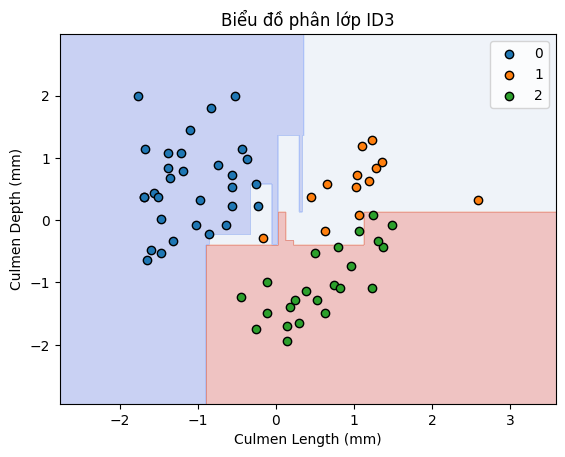

In [807]:
# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = joblib.load('id3.pkl').predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp ID3')
plt.legend()
plt.show()

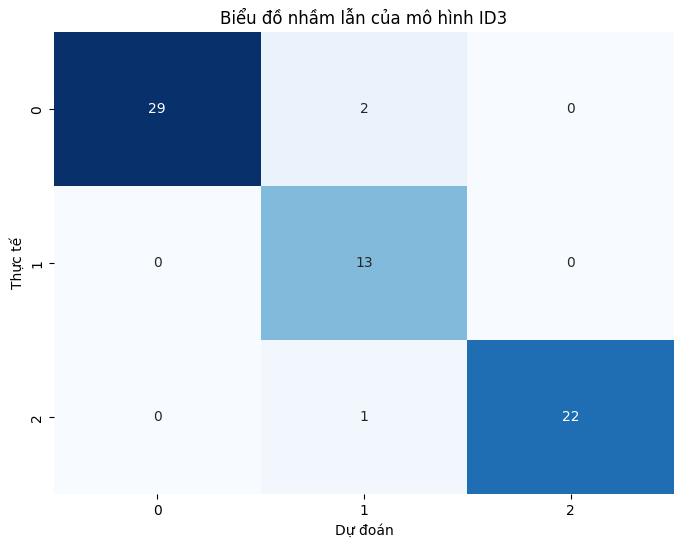

In [808]:

# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred_id3)

# Vẽ biểu đồ nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Biểu đồ nhầm lẫn của mô hình ID3')
plt.show()

# 5.Huấn luyện mô hình dựa trên Neural Network (MLPClassifier)


In [809]:
# Tạo mô hình MLP
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42, )

# Huấn luyện mô hình MLP
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=1000, random_state=42)

In [810]:
# Lưu mô hình
joblib.dump(mlp, 'mlp.pkl')



['mlp.pkl']

In [811]:
# Dự đoán trên tập kiểm tra
y_pred_mlp = joblib.load('mlp.pkl').predict(X_test)
print("Kết quả dự đoán của mô hình MLP trên tập kiểm tra:")
print("Giá trị thực tế (y_test):", y_test)
print("Kết quả dự đoán (y_pred_mlp):", y_pred_mlp)
print("Độ chính xác:", accuracy_score(y_test, y_pred_mlp))

#

Kết quả dự đoán của mô hình MLP trên tập kiểm tra:
Giá trị thực tế (y_test): 30     0
317    2
79     0
201    1
63     0
      ..
288    2
4      0
83     0
319    2
66     0
Name: species, Length: 67, dtype: int64
Kết quả dự đoán (y_pred_mlp): [0 2 0 1 0 2 2 1 1 1 1 0 2 0 2 0 0 1 0 2 0 0 2 1 0 0 2 2 1 2 1 2 0 0 2 2 1
 2 0 0 0 0 1 1 0 0 2 0 0 2 0 2 2 0 0 2 0 0 1 1 1 2 2 0 0 2 0]
Độ chính xác: 0.9701492537313433


In [812]:
# Đánh giá mô hình MLP
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

MLP Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.87      1.00      0.93        13
           2       1.00      0.96      0.98        23

    accuracy                           0.97        67
   macro avg       0.96      0.97      0.96        67
weighted avg       0.97      0.97      0.97        67



In [813]:
print("Ma trận nhầm lẫn mlp:", confusion_matrix(y_test, y_pred_mlp))

Ma trận nhầm lẫn mlp: [[30  1  0]
 [ 0 13  0]
 [ 0  1 22]]


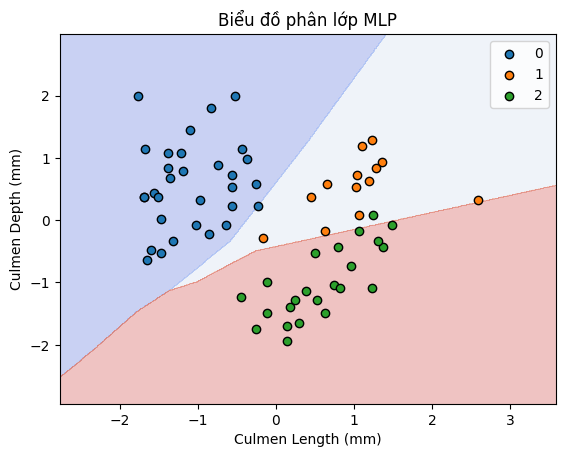

In [814]:
# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = joblib.load('mlp.pkl').predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp MLP')
plt.legend()
plt.show()

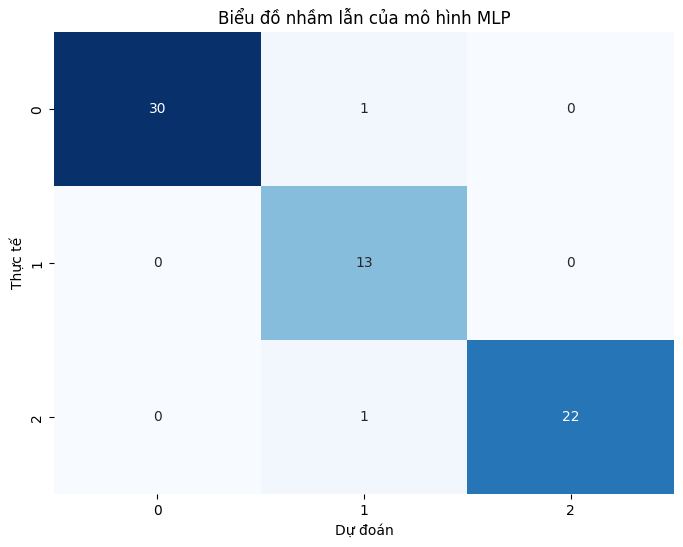

In [815]:

# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred_mlp)

# Vẽ biểu đồ nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Biểu đồ nhầm lẫn của mô hình MLP')
plt.show()

Bagging


In [816]:
from sklearn.ensemble import BaggingClassifier
# Tạo và huấn luyện mô hình Bagging với Decision Tree
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
print("\nKết quả dự đoán của Bagging:")
print("Độ chính xác:", accuracy_score(y_test, y_pred_bagging))
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred_bagging))
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred_bagging))


Kết quả dự đoán của Bagging:
Độ chính xác: 0.9701492537313433
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.87      1.00      0.93        13
           2       1.00      0.91      0.95        23

    accuracy                           0.97        67
   macro avg       0.96      0.97      0.96        67
weighted avg       0.97      0.97      0.97        67

Ma trận nhầm lẫn:
[[31  0  0]
 [ 0 13  0]
 [ 0  2 21]]


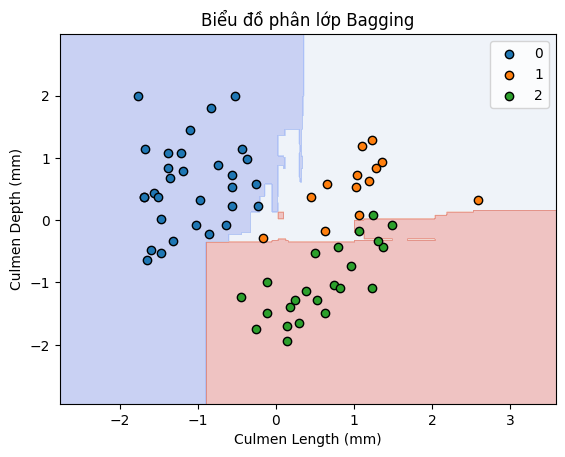

In [817]:
# Vẽ biểu đồ phân lớp
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Dự đoán trên lưới
Z = bagging_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường biên quyết định
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Vẽ các điểm dữ liệu
for i, species in enumerate(np.unique(y_test)):
    mask = y_test == species
    plt.scatter(X_test[mask, 0], X_test[mask, 1], label=species, marker='o', edgecolor='k')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Biểu đồ phân lớp Bagging')
plt.legend()
plt.show()

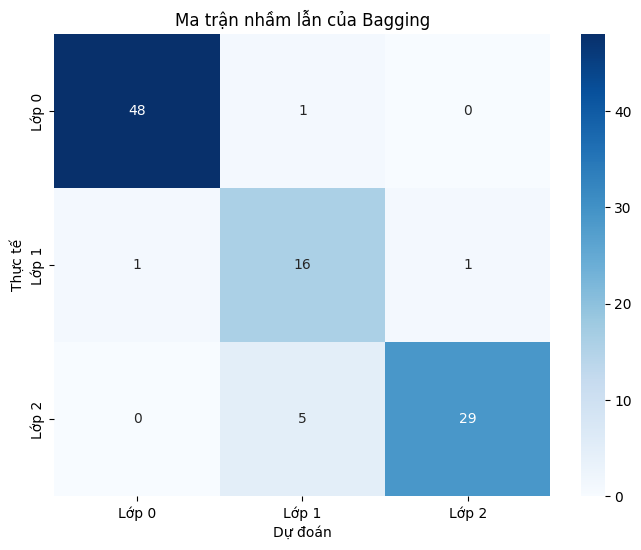

In [818]:

# Ma trận nhầm lẫn
conf_mat = np.array([[48, 1, 0], [1, 16, 1], [0, 5, 29]])

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', xticklabels=['Lớp 0', 'Lớp 1', 'Lớp 2'], yticklabels=['Lớp 0', 'Lớp 1', 'Lớp 2'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn của Bagging')
plt.show()

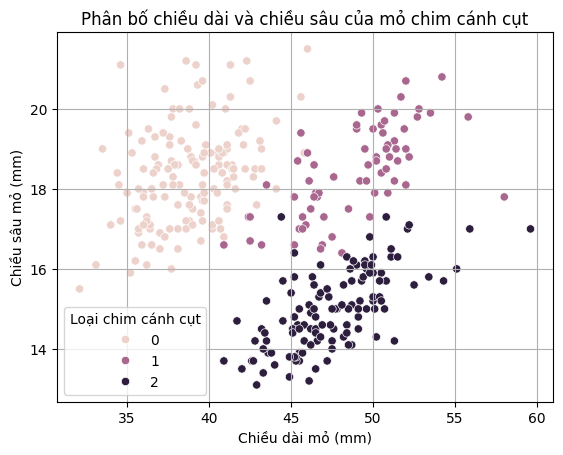

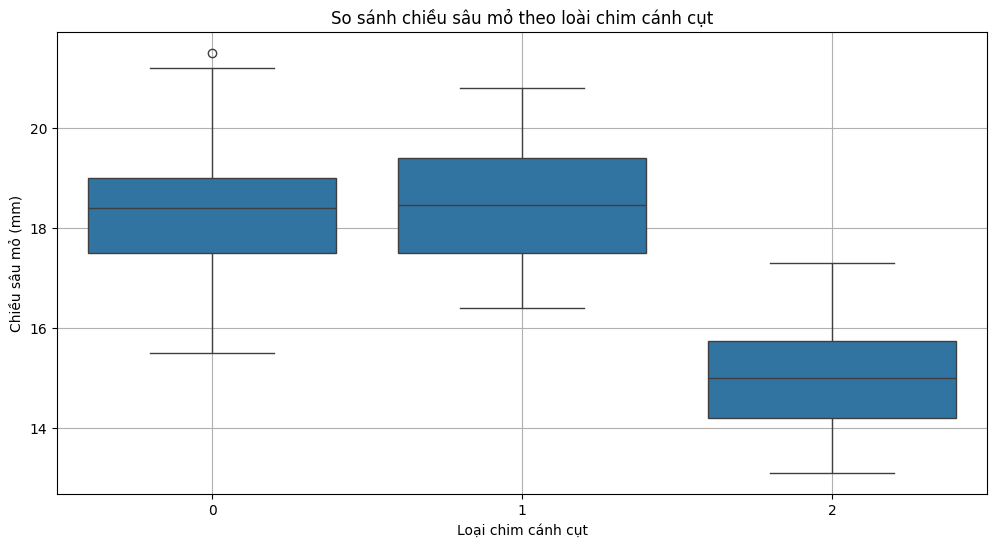

In [819]:
import seaborn as sns
# Vẽ biểu đồ phân tán
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.title('Phân bố chiều dài và chiều sâu của mỏ chim cánh cụt')
plt.xlabel('Chiều dài mỏ (mm)')
plt.ylabel('Chiều sâu mỏ (mm)')
plt.legend(title='Loại chim cánh cụt')
plt.grid()
plt.show()

# Vẽ biểu đồ hộp để so sánh chiều sâu mỏ theo loài
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='species', y='culmen_depth_mm')
plt.title('So sánh chiều sâu mỏ theo loài chim cánh cụt')
plt.xlabel('Loại chim cánh cụt')
plt.ylabel('Chiều sâu mỏ (mm)')
plt.grid()
plt.show()

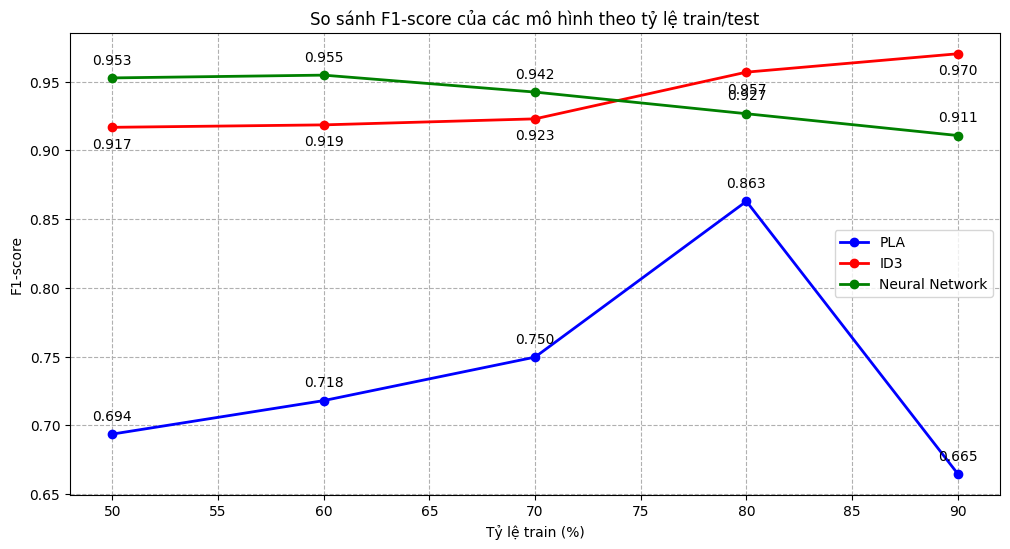

In [820]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Chuẩn bị dữ liệu
X = data[['culmen_length_mm', 'culmen_depth_mm']]
y = data['species']

# Tạo các tỷ lệ train/test
train_ratios = np.array([0.5, 0.6, 0.7, 0.8, 0.9])

# Khởi tạo các mô hình
pla_model = Perceptron(random_state=42)
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000)

# Lưu kết quả F1-score
pla_f1_scores = []
id3_f1_scores = []
nn_f1_scores = []

# Train và test các mô hình với từng tỷ lệ
for ratio in train_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)
    
    # PLA
    pla_model.fit(X_train, y_train)
    pla_pred = pla_model.predict(X_test)
    pla_f1 = f1_score(y_test, pla_pred, average='weighted')
    pla_f1_scores.append(pla_f1)
    
    # ID3
    id3_model.fit(X_train, y_train)
    id3_pred = id3_model.predict(X_test)
    id3_f1 = f1_score(y_test, id3_pred, average='weighted')
    id3_f1_scores.append(id3_f1)
    
    # Neural Network
    nn_model.fit(X_train, y_train)
    nn_pred = nn_model.predict(X_test)
    nn_f1 = f1_score(y_test, nn_pred, average='weighted')
    nn_f1_scores.append(nn_f1)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ đường cho từng mô hình
plt.plot(train_ratios * 100, pla_f1_scores, 'b-o', label='PLA', linewidth=2)
plt.plot(train_ratios * 100, id3_f1_scores, 'r-o', label='ID3', linewidth=2)
plt.plot(train_ratios * 100, nn_f1_scores, 'g-o', label='Neural Network', linewidth=2)

# Thêm nhãn cho các điểm
for i, ratio in enumerate(train_ratios):
    plt.annotate(f'{pla_f1_scores[i]:.3f}', 
                (ratio * 100, pla_f1_scores[i]),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')
    plt.annotate(f'{id3_f1_scores[i]:.3f}', 
                (ratio * 100, id3_f1_scores[i]),
                textcoords="offset points",
                xytext=(0,-15),
                ha='center')
    plt.annotate(f'{nn_f1_scores[i]:.3f}',  # sửa lỗi ở đây
                (ratio * 100, nn_f1_scores[i]),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

# Tùy chỉnh biểu đồ
plt.xlabel('Tỷ lệ train (%)')
plt.ylabel('F1-score')
plt.title('So sánh F1-score của các mô hình theo tỷ lệ train/test')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

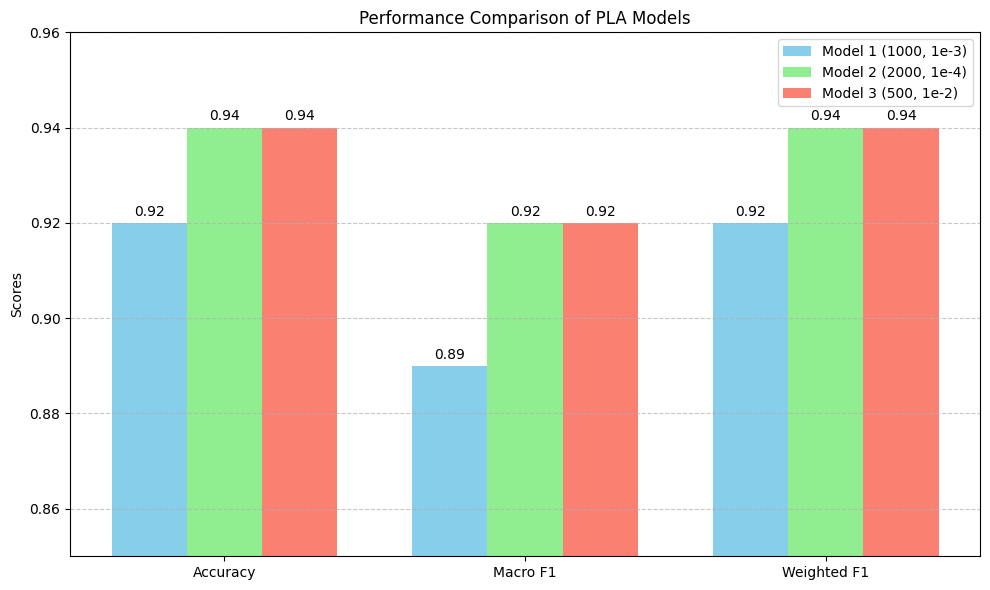

In [821]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
metrics = ['Accuracy', 'Macro F1', 'Weighted F1']
model1_scores = [0.92, 0.89, 0.92]  # Model 1 (1000, 1e-3)
model2_scores = [0.94, 0.92, 0.94]  # Model 2 (2000, 1e-4)
model3_scores = [0.94, 0.92, 0.94]  # Model 3 (500, 1e-2)

x = np.arange(len(metrics))  # vị trí của các cột
width = 0.25  # độ rộng của cột

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, model1_scores, width, label='Model 1 (1000, 1e-3)', color='skyblue')
rects2 = ax.bar(x, model2_scores, width, label='Model 2 (2000, 1e-4)', color='lightgreen')
rects3 = ax.bar(x + width, model3_scores, width, label='Model 3 (500, 1e-2)', color='salmon')

# Tùy chỉnh biểu đồ
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of PLA Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Thêm giá trị lên đầu các cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 điểm offset dọc
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Đặt giới hạn trục y từ 0.8 đến 1.0 để thấy rõ sự khác biệt
ax.set_ylim(0.85, 0.96)

# Thêm lưới ngang để dễ đọc
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Điều chỉnh layout
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

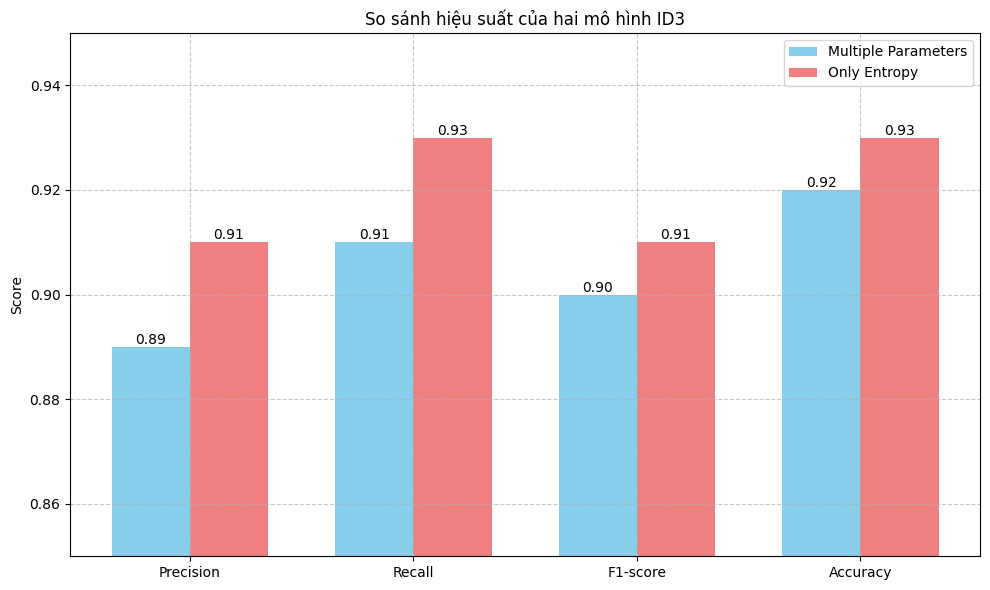

In [822]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu cho biểu đồ
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']

# Dữ liệu từ hai mô hình
model1_data = [0.89, 0.91, 0.90, 0.92]  # Multiple Parameters
model2_data = [0.91, 0.93, 0.91, 0.93]  # Only Entropy

# Thiết lập vị trí các cột
x = np.arange(len(metrics))
width = 0.35

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, model1_data, width, label='Multiple Parameters', color='skyblue')
bars2 = plt.bar(x + width/2, model2_data, width, label='Only Entropy', color='lightcoral')

# Chỉnh sửa biểu đồ
plt.ylabel('Score')
plt.title('So sánh hiệu suất của hai mô hình ID3')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm giá trị lên đầu mỗi cột
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

# Điều chỉnh giới hạn trục y để nhìn rõ sự khác biệt
plt.ylim(0.85, 0.95)

plt.tight_layout()
plt.show()

c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


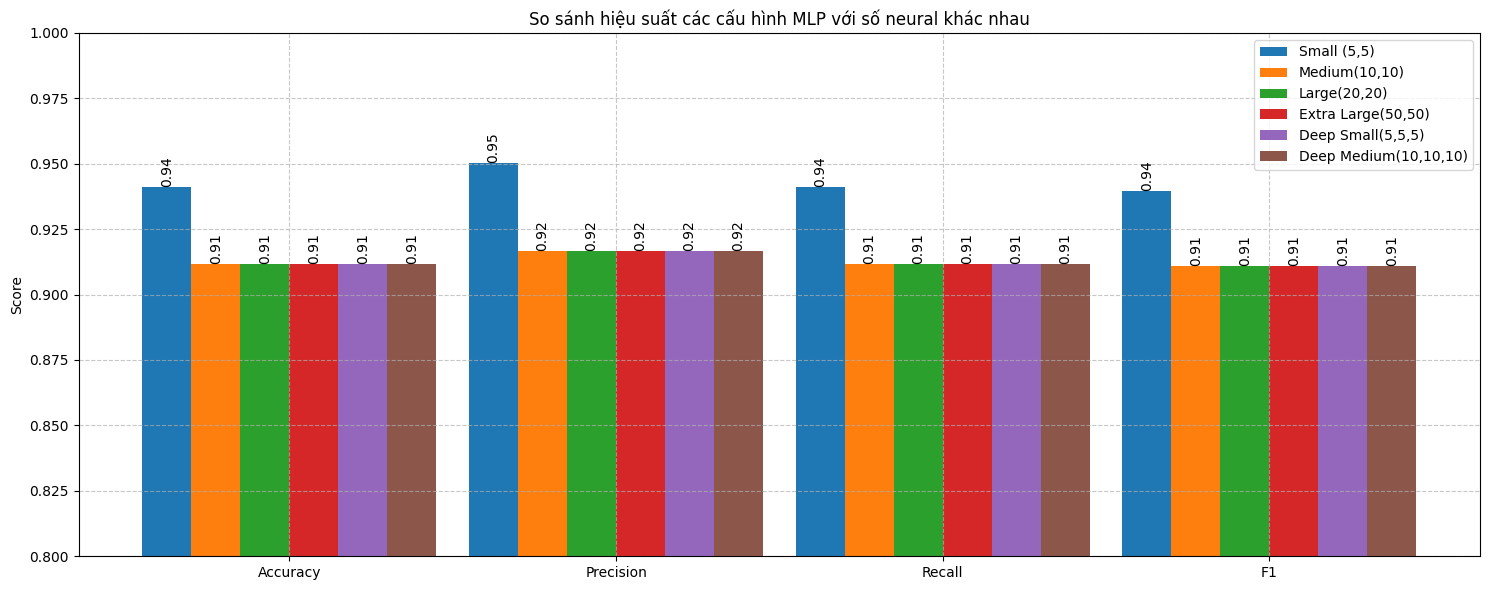


Kết quả chi tiết:

Small (5,5):
Accuracy: 0.9412
Precision: 0.9502
Recall: 0.9412
F1: 0.9394

Medium(10,10):
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

Large(20,20):
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

Extra Large(50,50):
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

Deep Small(5,5,5):
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

Deep Medium(10,10,10):
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108


In [823]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Tạo các cấu hình với số neural khác nhau
configurations = {
    'Small (5,5)': (5, 5),
    'Medium(10,10)': (10, 10),
    'Large(20,20)': (20, 20),
    'Extra Large(50,50)': (50, 50),
    'Deep Small(5,5,5)': (5, 5, 5),
    'Deep Medium(10,10,10)': (10, 10, 10),
}

# Dictionary để lưu kết quả
results = {}

# Huấn luyện và đánh giá từng mô hình
for name, hidden_layer_sizes in configurations.items():
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        max_iter=1000,
        random_state=42
    )
    
    # Huấn luyện mô hình
    mlp.fit(X_train, y_train)
    
    # Dự đoán
    y_pred = mlp.predict(X_test)
    
    # Tính các metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }

# Vẽ biểu đồ so sánh
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x = np.arange(len(metrics))
width = 0.15  # Độ rộng của mỗi cột

plt.figure(figsize=(15, 6))

# Vẽ cột cho từng cấu hình
for i, (name, scores) in enumerate(results.items()):
    values = [scores[metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=name)

# Chỉnh sửa biểu đồ
plt.ylabel('Score')
plt.title('So sánh hiệu suất các cấu hình MLP với số neural khác nhau')
plt.xticks(x + width * 2.5, metrics)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm giá trị lên đầu mỗi cột
for i, (name, scores) in enumerate(results.items()):
    for j, metric in enumerate(metrics):
        plt.text(j + i*width, scores[metric],
                f'{scores[metric]:.2f}',
                ha='center', va='bottom',
                rotation=90)

plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

# In kết quả chi tiết
print("\nKết quả chi tiết:")
for name, scores in results.items():
    print(f"\n{name}:")
    for metric, value in scores.items():
        print(f"{metric}: {value:.4f}")

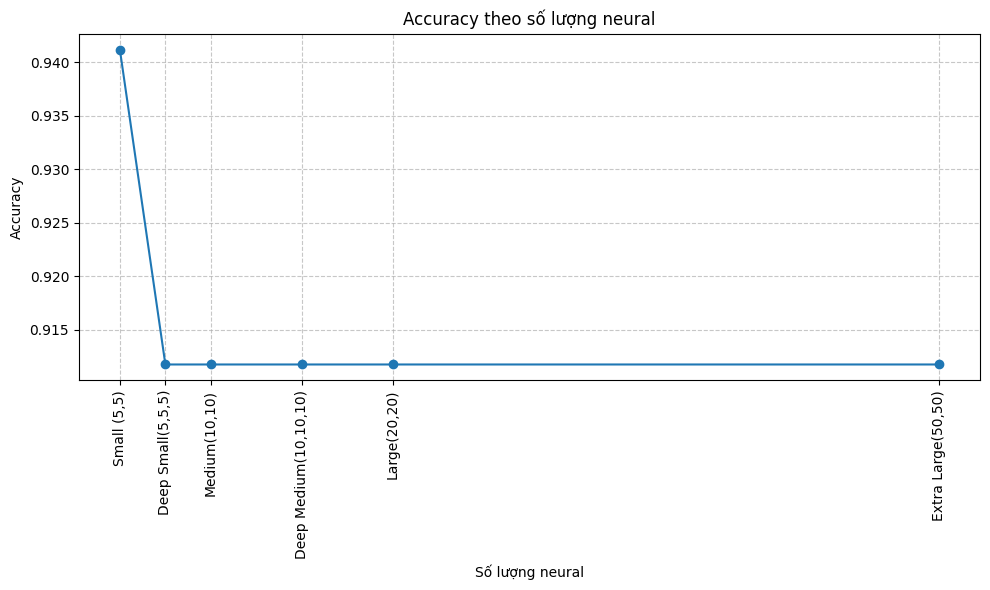

In [824]:
# Vẽ biểu đồ đường cho accuracy theo số lượng neural
plt.figure(figsize=(10, 6))

# Lấy số lượng neural tổng cộng cho mỗi cấu hình
total_neurons = {
    'Small (5,5)': 10,
    'Medium(10,10)': 20,
    'Large(20,20)': 40,
    'Extra Large(50,50)': 100, # 50*2
    'Deep Small(5,5,5)': 15,  # 5*3
    'Deep Medium(10,10,10)': 30,  # 10*3
}

# Sắp x��p theo số lượng neural tăng dần
sorted_names = sorted(total_neurons, key=total_neurons.get)

# Vẽ biểu đồ đường
plt.plot([total_neurons[name] for name in sorted_names],
         [results[name]['Accuracy'] for name in sorted_names],
         marker='o')

# Chỉnh sửa biểu đồ
plt.xlabel('Số lượng neural')
plt.ylabel('Accuracy')
plt.title('Accuracy theo số lượng neural')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([total_neurons[name] for name in sorted_names],
           [name for name in sorted_names], rotation=90)
plt.tight_layout()
plt.show()

c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



ReLU:
Accuracy: 0.9412
Precision: 0.9502
Recall: 0.9412
F1: 0.9394

Sigmoid:
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

Tanh:
Accuracy: 0.4412
Precision: 0.1946
Recall: 0.4412
F1: 0.2701

Identity:
Accuracy: 0.9118
Precision: 0.9166
Recall: 0.9118
F1: 0.9108

So sánh tổng quan:
             ReLU  Sigmoid    Tanh  Identity
Accuracy   0.9412   0.9118  0.4412    0.9118
Precision  0.9502   0.9166  0.1946    0.9166
Recall     0.9412   0.9118  0.4412    0.9118
F1         0.9394   0.9108  0.2701    0.9108


c:\Users\Quang-test\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


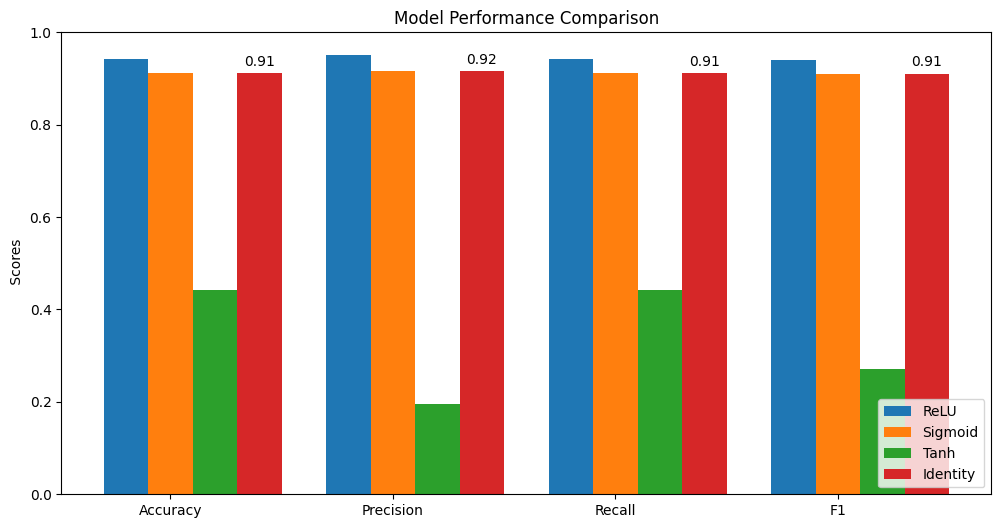

In [825]:
activation_configs = {
    'ReLU': MLPClassifier(hidden_layer_sizes=(5,5), activation='relu', 
                         max_iter=1000, random_state=42),
    'Sigmoid': MLPClassifier(hidden_layer_sizes=(5,5), activation='logistic', 
                            max_iter=1000, random_state=42),
    'Tanh': MLPClassifier(hidden_layer_sizes=(5,5), activation='tanh', 
                         max_iter=1000, random_state=42),
    'Identity': MLPClassifier(hidden_layer_sizes=(5,5), activation='identity', 
                            max_iter=1000, random_state=42)
                    }
# Dictionary lưu kết quả
results = {}

# Train và đánh giá từng mô hình
for name, model in activation_configs.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Tính các metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }

# In kết quả chi tiết
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# Tạo DataFrame để so sánh dễ dàng
df_results = pd.DataFrame(results).round(4)
print("\nSo sánh tổng quan:")
print(df_results)

# Visualize results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x = np.arange(len(metrics))
width = 0.2
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6))

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, [measurement[metric] for metric in metrics], 
                   width, label=attribute)
    multiplier += 1

ax.set_ylabel(' Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width, metrics)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

plt.show()